# A2C Agent 

In [3]:
import gym
from a2c import A2CAgent 
import time

# Create Gym environment
env = gym.make("CartPole-v1")

# Check agent class for initialization parameters and initialize agent
gamma = 0.9
lr = 1e-3

agent = A2CAgent(env, gamma, lr)

# Define training parameters
max_episodes = 500
max_steps = 500

episode_rewards = []
run_time = []
start_time = time.time()
for episode in range(max_episodes):
    trajectory = []
    state = env.reset()
    episode_reward = 0
    for step in range(max_steps):
        action = agent.get_action(state)
        next_state, reward, done, _ = env.step(action)
        trajectory.append((state, action, reward, next_state, done))
        episode_reward += reward  
        if done or step == max_steps:
            episode_rewards.append(episode_reward)
            print("Episode " + str(episode) + ": " + str(episode_reward))
            break
        state = next_state
    agent.update(trajectory, 0)
    elapse = time.time() - start_time
    run_time.append(elapse)
    
a2c_rewards = episode_rewards
a2c_runtime = run_time

Episode 0: 24.0
Episode 1: 29.0
Episode 2: 18.0
Episode 3: 15.0
Episode 4: 45.0
Episode 5: 17.0
Episode 6: 125.0
Episode 7: 21.0
Episode 8: 38.0
Episode 9: 16.0
Episode 10: 36.0
Episode 11: 26.0
Episode 12: 27.0
Episode 13: 33.0
Episode 14: 50.0
Episode 15: 72.0
Episode 16: 14.0
Episode 17: 17.0
Episode 18: 17.0
Episode 19: 28.0
Episode 20: 59.0
Episode 21: 17.0
Episode 22: 48.0
Episode 23: 38.0
Episode 24: 82.0
Episode 25: 52.0
Episode 26: 30.0
Episode 27: 38.0
Episode 28: 21.0
Episode 29: 20.0
Episode 30: 32.0
Episode 31: 21.0
Episode 32: 58.0
Episode 33: 28.0
Episode 34: 41.0
Episode 35: 56.0
Episode 36: 59.0
Episode 37: 31.0
Episode 38: 66.0
Episode 39: 26.0
Episode 40: 52.0
Episode 41: 61.0
Episode 42: 42.0
Episode 43: 51.0
Episode 44: 47.0
Episode 45: 73.0
Episode 46: 35.0
Episode 47: 45.0
Episode 48: 48.0
Episode 49: 15.0
Episode 50: 48.0
Episode 51: 28.0
Episode 52: 46.0
Episode 53: 64.0
Episode 54: 68.0
Episode 55: 40.0
Episode 56: 33.0
Episode 57: 20.0
Episode 58: 76.0
Episod

Episode 449: 203.0
Episode 450: 170.0
Episode 451: 141.0
Episode 452: 156.0
Episode 453: 224.0
Episode 454: 231.0
Episode 455: 179.0
Episode 456: 270.0
Episode 457: 168.0
Episode 458: 203.0
Episode 459: 213.0
Episode 460: 209.0
Episode 461: 234.0
Episode 462: 233.0
Episode 463: 215.0
Episode 464: 192.0
Episode 465: 255.0
Episode 466: 180.0
Episode 467: 236.0
Episode 468: 256.0
Episode 469: 183.0
Episode 470: 342.0
Episode 471: 180.0
Episode 472: 210.0
Episode 473: 198.0
Episode 474: 236.0
Episode 475: 286.0
Episode 476: 232.0
Episode 477: 211.0
Episode 478: 232.0
Episode 479: 220.0
Episode 480: 211.0
Episode 481: 318.0
Episode 482: 214.0
Episode 483: 211.0
Episode 484: 231.0
Episode 485: 199.0
Episode 486: 165.0
Episode 487: 216.0
Episode 488: 288.0
Episode 489: 260.0
Episode 490: 158.0
Episode 491: 302.0
Episode 492: 283.0
Episode 493: 277.0
Episode 494: 210.0
Episode 495: 260.0
Episode 496: 311.0
Episode 497: 225.0
Episode 498: 251.0
Episode 499: 254.0


# DR TRPO Agent (KL) 

In [1]:
import gym
from a2c_dr_trpo import DRTRPOAgent1  
import time

# Create Gym environment
env = gym.make("CartPole-v1")

# Check agent class for initialization parameters and initialize agent
gamma = 0.9
lr = 1e-3

agent = DRTRPOAgent1(env, gamma, lr)

############################### MC Updates  (Full Episode) ###############################

# Define training parameters
max_episodes = 800
max_steps = 500

episode_rewards = []
run_time = []
start_time = time.time()
for episode in range(max_episodes):
    first_state = env.reset()
    state_adv = []
    total_value_loss = 0
    
    episode_reward = 0
    # loop through the first action
    for i in range(env.action_space.n):
        env.reset()
        state = first_state
        action = i
        trajectory = []
        
        for step in range(max_steps):
            if step != 0:
                action = agent.get_action(state)
            next_state, reward, done, _ = env.step(action)
            trajectory.append((state, action, reward, next_state, done))
            episode_reward += reward  
            if done or step == max_steps-1:
                break
            state = next_state
            
        adv, value_loss = agent.compute_adv_mc(trajectory)
        state_adv.append(adv[1])
        total_value_loss += value_loss
        
    policy_loss = agent.compute_policy_loss(state, state_adv)
    agent.update(value_loss, policy_loss)
    elapse = time.time() - start_time
    run_time.append(elapse)
    
    episode_rewards.append(episode_reward/env.action_space.n)
    print("Episode " + str(episode) + ": " + str(episode_reward))

dr_trpo_rewards = episode_rewards
dr_trpo_runtime = run_time

Episode 0: 91.0
Episode 1: 23.0
Episode 2: 36.0
Episode 3: 28.0
Episode 4: 66.0
Episode 5: 44.0
Episode 6: 37.0
Episode 7: 32.0
Episode 8: 55.0
Episode 9: 38.0
Episode 10: 65.0
Episode 11: 35.0
Episode 12: 41.0
Episode 13: 27.0
Episode 14: 22.0
Episode 15: 24.0
Episode 16: 48.0
Episode 17: 43.0
Episode 18: 31.0
Episode 19: 41.0
Episode 20: 34.0
Episode 21: 37.0
Episode 22: 47.0
Episode 23: 49.0
Episode 24: 35.0
Episode 25: 56.0
Episode 26: 38.0
Episode 27: 50.0
Episode 28: 67.0
Episode 29: 59.0
Episode 30: 38.0
Episode 31: 37.0
Episode 32: 35.0
Episode 33: 124.0
Episode 34: 65.0
Episode 35: 23.0
Episode 36: 59.0
Episode 37: 32.0
Episode 38: 40.0
Episode 39: 57.0
Episode 40: 53.0
Episode 41: 51.0
Episode 42: 71.0
Episode 43: 39.0
Episode 44: 45.0
Episode 45: 66.0
Episode 46: 32.0
Episode 47: 55.0
Episode 48: 43.0
Episode 49: 41.0
Episode 50: 78.0
Episode 51: 34.0
Episode 52: 62.0
Episode 53: 60.0
Episode 54: 54.0
Episode 55: 55.0
Episode 56: 93.0
Episode 57: 90.0
Episode 58: 65.0
Episod

Episode 457: 219.0
Episode 458: 170.0
Episode 459: 152.0
Episode 460: 171.0
Episode 461: 127.0
Episode 462: 54.0
Episode 463: 118.0
Episode 464: 160.0
Episode 465: 124.0
Episode 466: 67.0
Episode 467: 112.0
Episode 468: 290.0
Episode 469: 235.0
Episode 470: 193.0
Episode 471: 193.0
Episode 472: 146.0
Episode 473: 169.0
Episode 474: 268.0
Episode 475: 192.0
Episode 476: 155.0
Episode 477: 127.0
Episode 478: 119.0
Episode 479: 143.0
Episode 480: 213.0
Episode 481: 165.0
Episode 482: 149.0
Episode 483: 256.0
Episode 484: 290.0
Episode 485: 326.0
Episode 486: 250.0
Episode 487: 295.0
Episode 488: 188.0
Episode 489: 135.0
Episode 490: 254.0
Episode 491: 237.0
Episode 492: 223.0
Episode 493: 250.0
Episode 494: 229.0
Episode 495: 117.0
Episode 496: 198.0
Episode 497: 200.0
Episode 498: 135.0
Episode 499: 281.0
Episode 500: 193.0
Episode 501: 165.0
Episode 502: 178.0
Episode 503: 308.0
Episode 504: 197.0
Episode 505: 87.0
Episode 506: 120.0
Episode 507: 357.0
Episode 508: 166.0
Episode 509: 21

# Graph

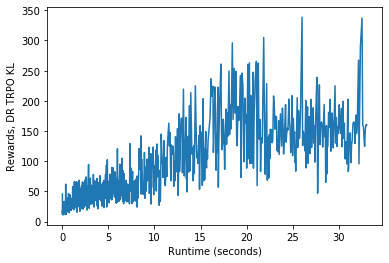

In [2]:
import matplotlib.pyplot as plt
import time
import numpy as np

plt.plot(dr_trpo_runtime, dr_trpo_rewards)
plt.ylabel('Rewards, DR TRPO KL')
plt.xlabel('Runtime (seconds)')
plt.show()

name = './log_files/dr_trpo_kl/' + str(time.time()) + '.csv' 
out = np.column_stack((dr_trpo_runtime, dr_trpo_rewards))
with open(name, 'ab') as f:
    np.savetxt(f, out, delimiter=',')

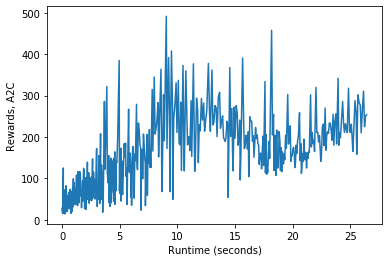

In [4]:
plt.plot(a2c_runtime, a2c_rewards)
plt.ylabel('Rewards, A2C')
plt.xlabel('Runtime (seconds)')
plt.show()

name = './log_files/a2c/' + str(time.time()) + '.csv' 
out = np.column_stack((a2c_runtime, a2c_rewards))
with open(name, 'ab') as f:
    np.savetxt(f, out, delimiter=',')